# Milestone 2: Cleaning/Formatting Flat File Source

For my project, I chose daily historical stock price data as my flat source. This data is available on a number of different websites, but I'll be using the historical download section of Yahoo Finance to download the raw CSV files needed to make this project work.

!["Amazon Stock Price"](yahoo_amzn.JPG)

Yahoo allows visitors to download raw stock price data from their website. Users can input their time period of choice, whether or not they want to see stock splits or dividend data, and the frequency at which they want the data to be presented. 


I'll first design a class that allows a user to extract the data from Yahoo Finance using `pd.read_csv`.

## Building a class to pull data from Yahoo Finance

In [1]:
import pandas as pd
import datetime

class Ticker():
    def __init__(self, 
                 ticker, 
                 start = '1/1/1900', 
                 end = datetime.date.today().strftime('%m/%d/%Y') , 
                 freq = "d"):
        
        # Defining the ticker
        self.ticker = ticker
        # Defining the type of data to collect
        self.freq = freq
        # Defining the url to query
        self.url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1{}&events=history&includeAdjustedClose=true"
        # Defining the starting timestamp
        # Since many companies went public before 1970, I need a method to convert the date into a negative timestamp
        # TODO // Fix this mess. Not sure if I should use a constructor or not?
        # Start Time
        epoch = datetime.datetime(1970, 1, 1)  # calculate the epoch timestamp 
        month, day, year = start.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.start = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        # End Time
        month, day, year = end.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.end = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        
    def get_price(self):
        stock_price = pd.read_csv(self.url.format(self.ticker,
                                                  self.start,
                                                  self.end,
                                                  self.freq), index_col=0 )
        return stock_price

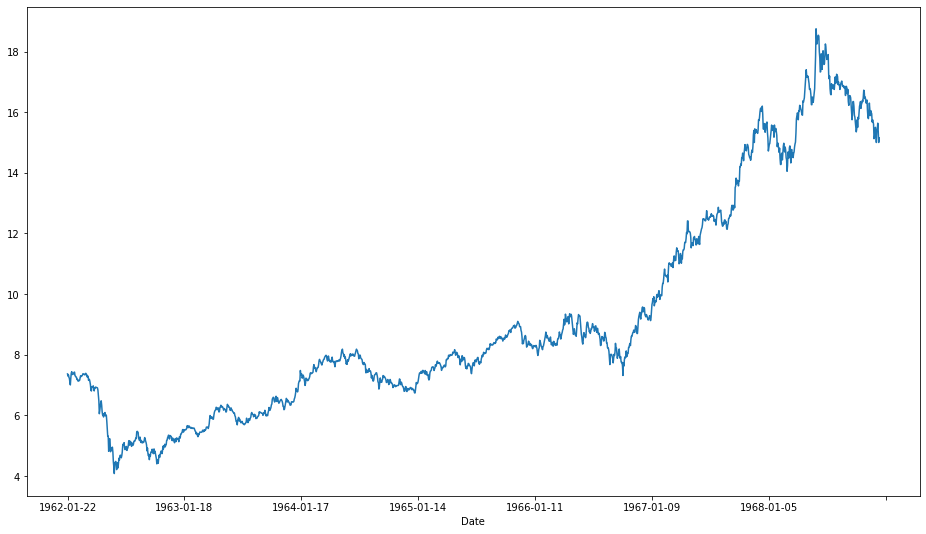

In [2]:
Ticker(ticker = "IBM", 
           start = "1/20/1962", 
           end = "1/22/1969", 
           freq = "d").get_price()['Close'].plot(figsize = (16,9));

## Building a class to pull data for multiple tickers

In [3]:
class Tickers():
    def __init__(self, 
                 tickers, 
                 start = '1/1/1900', 
                 end = datetime.date.today().strftime('%m/%d/%Y') , 
                 freq = "d"):
        
        # Defining the ticker
        self.tickers = tickers
        # Defining the type of data to collect
        self.freq = freq
        # Defining the url to query
        self.url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1{}&events=history&includeAdjustedClose=true"
        # Defining the starting timestamp
        # Since many companies went public before 1970, I need a method to convert the date into a negative timestamp
        # TODO // Fix this mess. Not sure if I should use a constructor or not?
        # Start Time
        epoch = datetime.datetime(1970, 1, 1)  # calculate the epoch timestamp 
        month, day, year = start.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.start = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        # End Time
        month, day, year = end.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.end = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        
    def get_prices(self):
        df = pd.DataFrame()
        for i in self.tickers:
            stock_price = pd.read_csv(self.url.format(i,
                                                  self.start,
                                                  self.end,
                                                  self.freq), index_col=0 )
            stock_price['Ticker'] = i
            df = pd.concat([df, stock_price])
        return df

In [4]:
faang = Tickers(tickers = ['FB','AAPL','AMZN','NFLX','GOOG'], 
           start = "1/1/2010", 
           freq = "d").get_prices()

In [5]:
import matplotlib.pyplot as plt

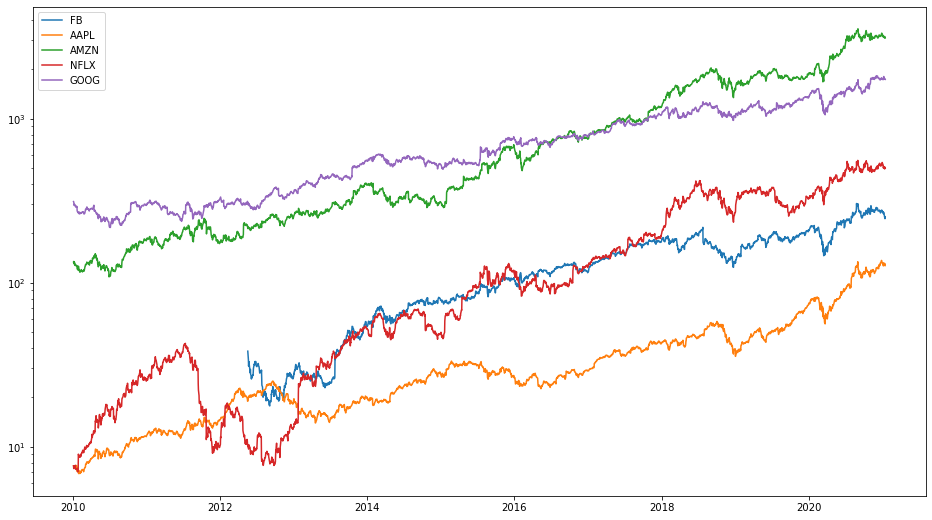

In [6]:
plt.figure(figsize=(16,9))
for i in faang['Ticker'].unique():
    subset = faang[faang['Ticker'] == i]
    plt.plot(pd.to_datetime(subset.index), subset['Close'])
    plt.yscale("log")

plt.legend(labels = faang['Ticker'].unique())    
plt.show()